In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.4.0
sys.version_info(major=3, minor=6, micro=7, releaselevel='final', serial=0)
matplotlib 3.3.3
numpy 1.19.5
pandas 1.1.5
sklearn 0.24.0
tensorflow 2.4.0
tensorflow.keras 2.4.0


In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
from sklearn.model_selection import train_test_split

xtrain_all, xtest, ytrain_all, ytest = train_test_split(housing.data, housing.target, random_state=7)
xtrain, xvalid, ytrain, yvalid = train_test_split(xtrain_all ,ytrain_all, random_state=11)
print(xtrain.shape, ytrain.shape)
print(xvalid.shape, yvalid.shape)
print(xtest.shape, ytest.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xvalid_scaled= scaler.transform(xvalid)
xtest_scaled = scaler.transform(xtest)

In [6]:
# 注：无法使用 sequential 的方式来实现模型
# 使用函数式 API
input = keras.layers.Input(shape=xtrain.shape[1:])  # input is 8
hidden1 = keras.layers.Dense(30, activation='relu')(input)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1) # 为符合函数

# 合并 input 和 hidden2
concat = keras.layers.concatenate([input, hidden2])
output = keras.layers.Dense(1)(concat)

# 用 model 把其固化下来
model = keras.models.Model(inputs=[input], outputs=[output])
model.summary()
model.compile(loss="mean_squared_error", optimizer = keras.optimizers.SGD(0.001))
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-5)]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [7]:
history = model.fit(xtrain_scaled, ytrain, 
                    validation_data=(xvalid_scaled, yvalid),
                    epochs=100, callbacks=callbacks)

Epoch 1/100
363/363 [==============================] - 2s 2ms/step - loss: 3.6678 - val_loss: 0.8499
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.7224 - val_loss: 0.6845
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6155 - val_loss: 0.6533
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5926 - val_loss: 0.6246
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5736 - val_loss: 0.6065
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5714 - val_loss: 0.5861
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5478 - val_loss: 0.5739
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5373 - val_loss: 0.5576
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5042 - val_loss: 0.5462
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5305 - val_lo

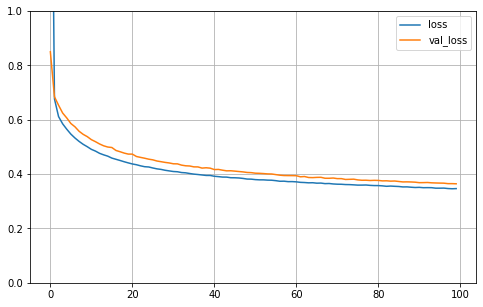

In [8]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curves(history)

In [9]:
model.evaluate(xtest_scaled, ytest, verbose=0)

0.36758536100387573